# WineQuality

### Load the data

1. Load wine data from the two source files winequality-red.xlsx and winequalitywhite.xslx, which you can find in the Data Science repository on Github: https://github.com/datsoftlyngby/dat2024spring-bi/tree/main/data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk

import matplotlib.pyplot as plt

C:\Users\yusef\AppData\Local\Temp\ipykernel_20220\225887528.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
dfr = pd.read_excel("./data/winequality-red.xlsx", index_col=None, na_values=["NA"])
dfw = pd.read_excel("./data/winequality-white.xlsx", index_col=None, na_values=["NA"])

2. Clean the data in both files.

In [3]:
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


3. Aggregate the two files in one still keeping the identity of each wine type - “red” or “white”.

In [5]:
dfr['wine_type'] = 'red'
dfw['wine_type'] = 'white'

combined_df = pd.concat([dfr, dfw])

# Reset index
combined_df.reset_index(drop=True, inplace=True)

In [6]:
combined_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [7]:
combined_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [8]:
combined_df.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
2677,6.5,0.26,0.34,16.3,0.051,56.0,197.0,1.00040,3.49,0.42,9.8,5,white
628,8.7,0.54,0.26,2.5,0.097,7.0,31.0,0.99760,3.27,0.60,9.3,6,red
2653,7.0,0.31,0.52,1.7,0.029,5.0,61.0,0.99180,3.07,0.43,10.4,5,white
6482,4.9,0.47,0.17,1.9,0.035,60.0,148.0,0.98964,3.27,0.35,11.5,6,white
4883,8.0,0.34,0.25,6.4,0.035,38.0,103.0,0.99148,2.91,0.23,12.2,6,white
6141,6.9,0.28,0.37,9.1,0.037,16.0,76.0,0.99480,3.05,0.54,11.1,5,white
5430,6.8,0.31,0.19,3.5,0.086,30.0,130.0,0.99300,2.83,0.44,9.6,5,white
5807,5.6,0.23,0.29,3.1,0.023,19.0,89.0,0.99068,3.25,0.51,11.2,6,white
4174,6.7,0.17,0.42,10.4,0.038,85.0,182.0,0.99628,3.04,0.44,8.9,6,white
984,12.2,0.45,0.49,1.4,0.075,3.0,6.0,0.99690,3.13,0.63,10.4,5,red


### Explore the data

4. Explore the features of the original and the new files:
 - number of rows and columns
 - type of data in each column


In [9]:
combined_df.shape

(6497, 13)

In [10]:
combined_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object

5. Calculate the descriptive statistics of the numeric data. Is the data normally distributed?


In [11]:
combined_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


We can see here some data-statistics. We can see the count of all non-null values of each category, herof none are null, they all have 6497 entries, which means no missing data. We did our job of cleaning the data thus far. One could argue that duplicates could be removed, but as we will soon see a mapping over value-frequency, we will leave them be.

Mean shows us the average of each column, hereof we could create an overview of frequency

Then we have std, which shows the amount of variation in out dataset. A greater std means more variety in values. Again we could have dropped duplicates to improve this number, but let us stick to the data as is.

the remaining rows are self-explainatory, we get from all these combined a range of values, and from there already see how far our extremities deviate from our average.

6. Plot diagrams that visualize the differences in red and white wine samples. Use it as a support for
answering the following questions:
a. what exactly is shown on the diagrams?
b. after seeing it, can you tell which type of wine has higher average quality?
c. which type of wine has higher average level of alcohol?
d. which one has higher average quantity of residual sugar? 

Lets start by comparing everything just for the sake of it. Lets start by first having all our categories. Lets not manually type it, but instead have our columns dispalyed, copied and saved:

In [12]:
combined_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'wine_type'],
      dtype='object')

In [13]:
features_to_compare = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

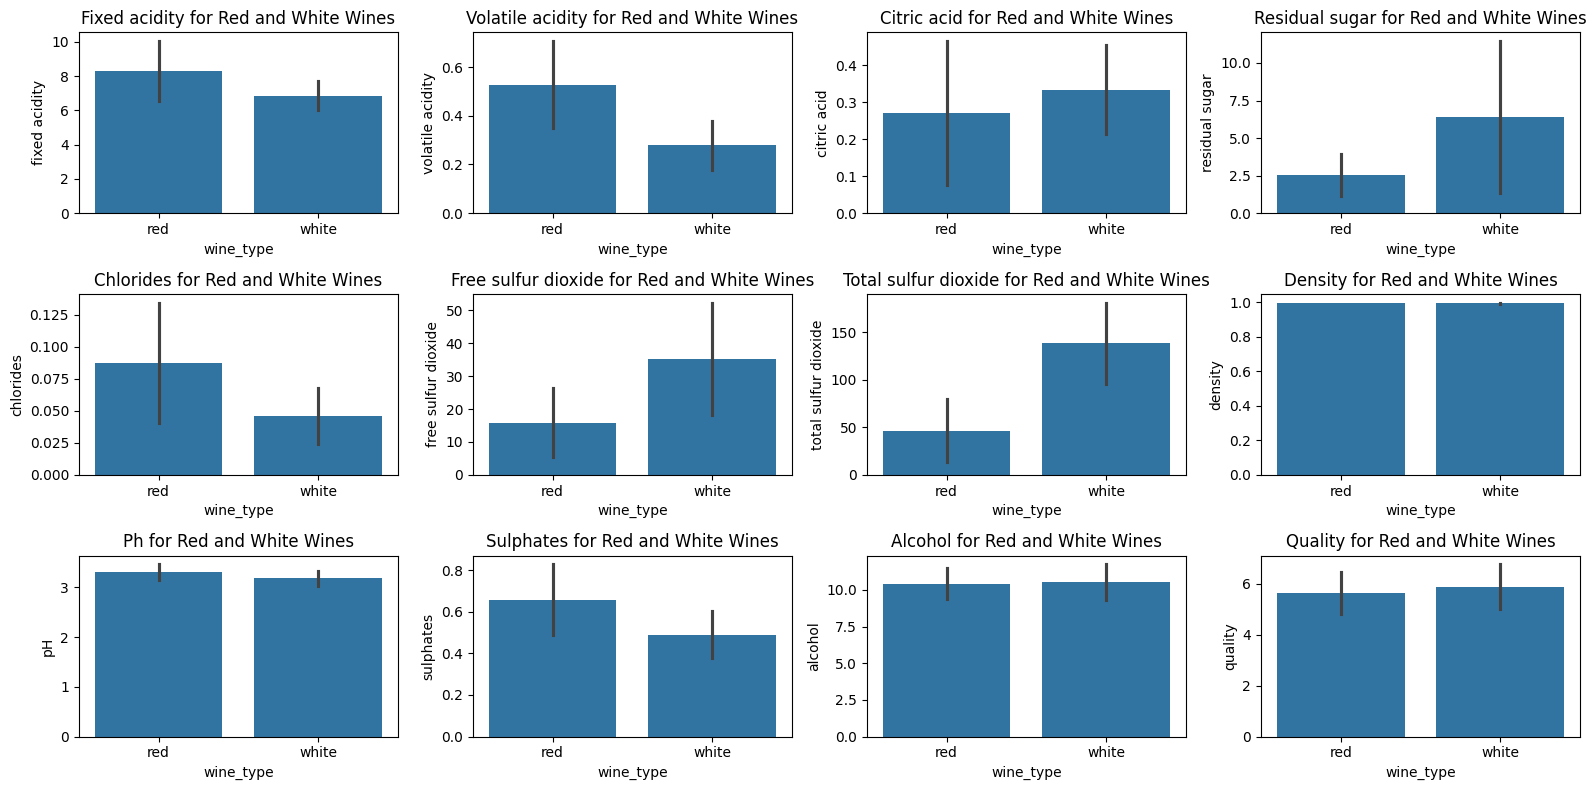

In [14]:
plt.figure(figsize=(16, 8))
# We can use this loop since we now have all the columns neatly extracted in an instant using columns method.
# We can now create a model for every little aspect and get a grand view.
for feature in features_to_compare:
    plt.subplot(3, 4, features_to_compare.index(feature) + 1)
    sns.barplot(x='wine_type', y=feature, data=combined_df, errorbar='sd')
    plt.title(f'{feature.capitalize()} for Red and White Wines')

plt.tight_layout()
plt.show()

Here we have a bunch of data. We can see a great visualization of every little aspect of each type. We can for example see that white wine excels in free sulfur dioxide - but that red has a slightly higher Ph giving us an idea of how it is more basey than white wines. In other words, a grand overview is what we have here.

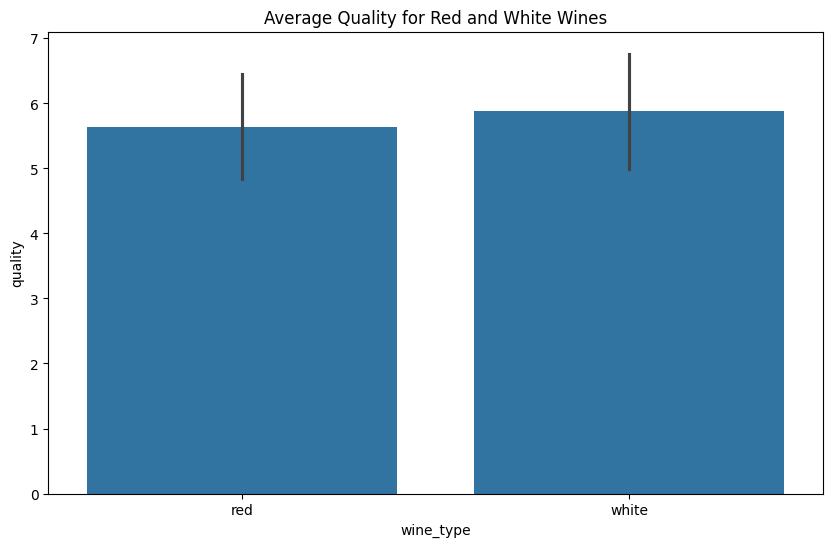

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(x='wine_type', y='quality', data=combined_df, errorbar='sd', order=['red', 'white'])
plt.title('Average Quality for Red and White Wines')
plt.show()

White seems to have the higher average quality, and also a higher rate of deviation. This means our dataset has a few outliers (special cases)

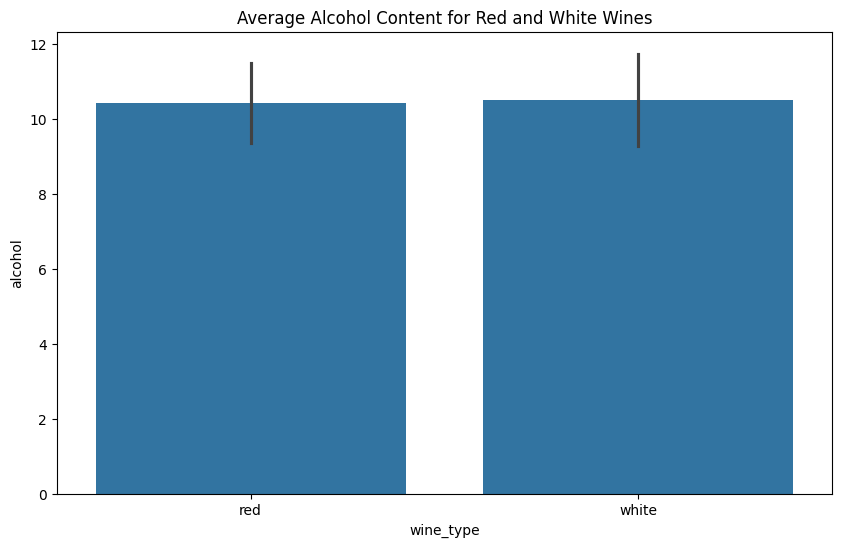

In [16]:
# lets see a visualization of the correlation between wine type and average alchohol content.

plt.figure(figsize=(10, 6))
sns.barplot(x='wine_type', y='alcohol', data=combined_df, errorbar='sd', order=['red', 'white'])
plt.title('Average Alcohol Content for Red and White Wines')
plt.show()


In [17]:
# Let us suppose we had bad eyesight and could not quite see which is truly higher. Fear not, we are programmers and are also business intelligent  
# Let us quickly see which has the highest average alchohol content between the two, but as a returned result rather than a model.

result = combined_df.groupby('wine_type')['alcohol'].mean().idxmax()
result

#We did this so we can show that things can be visualized 

'white'

<h3> Let us quickly sum up and answer all the questions to round off step 6. </h3>


a. We got a grand overview of all the data and can see smaller models of each aspect

b. White wine wins in terms of highest average quality

c. white has the highest as proven by our trusty python program.

d. We dont need to have the program return that for us, it is clear as day up at Line [30], white takes the cake on that one.

7. Which other questions might be of interest for the wine consumers or distributers?



One could look into it from a marketing standpoint:

<h3> 1. Price-to-quality relationship: </h3>
 - Which wine is preffered and what does it consist of?
  * hereof one could look into the contents and the best pulling wine, it can create a clearer focus on what sort of wine would be most efficient to sell.

<h3> 2. Attributes and preferences: </h3>
 - Which taste (sweetness, acidity...) was most-liked?
  * This could lead to better understanding of our demographic, the customers.

8. Split the aggregated data into five subsets by binning the attribute pH. Identify the subset with
the highest density? What if you split the data in ten subsets?


In [18]:
combined_df['pH_bins'] = pd.cut(combined_df['pH'], bins=5, labels=False)

# Creating subsets using groupby
subset_dict = {f'Subset{i+1}': group for i, group in combined_df.groupby('pH_bins')}


for subset_name, subset_df in subset_dict.items():
    print(f'{subset_name}: {len(subset_df)}')

subset_with_highest_density = max(subset_dict, key=lambda k: len(subset_dict[k]))

# And here we have the highest density subset - we couldve packaged this whole thing in to a function since we use it twice, but lets just keep it simple for now.
print(f'Subset with the highest density is: {subset_with_highest_density}')


bin_edges = pd.cut(combined_df['pH'], bins=5).unique()

print(bin_edges)

Subset1: 350
Subset2: 3344
Subset3: 2465
Subset4: 322
Subset5: 16
Subset with the highest density is: Subset2
[(3.494, 3.752], (2.978, 3.236], (3.236, 3.494], (3.752, 4.01], (2.719, 2.978]]
Categories (5, interval[float64, right]): [(2.719, 2.978] < (2.978, 3.236] < (3.236, 3.494] < (3.494, 3.752] < (3.752, 4.01]]


As we can see, subset 2 has the highest density with 3344 entries grouped. 
We even provided the bin edges which are needed to understand the ranges of each subset.
In other words the range between 2.978-3.236 has the highest density.

and if we split the data into ten subsets...

In [19]:
combined_df['pH_bins'] = pd.cut(combined_df['pH'], bins=10, labels=False)

subset_dict = {f'Subset{i+1}': group for i, group in combined_df.groupby('pH_bins')}


for subset_name, subset_df in subset_dict.items():
    print(f'{subset_name}: {len(subset_df)}')

subset_with_highest_density = max(subset_dict, key=lambda k: len(subset_dict[k]))

print(f'Subset with the highest density is: {subset_with_highest_density}')

bin_edges = pd.cut(combined_df['pH'], bins=10).unique()

print(bin_edges)


Subset1: 16
Subset2: 334
Subset3: 1233
Subset4: 2111
Subset5: 1663
Subset6: 802
Subset7: 263
Subset8: 59
Subset9: 12
Subset10: 4
Subset with the highest density is: Subset4
[(3.494, 3.623], (3.107, 3.236], (3.236, 3.365], (3.365, 3.494], (2.978, 3.107], (3.881, 4.01], (2.849, 2.978], (3.623, 3.752], (3.752, 3.881], (2.719, 2.849]]
Categories (10, interval[float64, right]): [(2.719, 2.849] < (2.849, 2.978] < (2.978, 3.107] < (3.107, 3.236] ... (3.494, 3.623] < (3.623, 3.752] < (3.752, 3.881] < (3.881, 4.01]]


Now it is subset 4 with the range 3.365-3.494 with the highest density.

9. Create a heat map or a correlation matrix of all data and investigate it. Can you tell which vine
attribute has the biggest influence on the wine quality? Which has the lowest?
Do you get the same results when you analyze the red and white wine data sets separately?


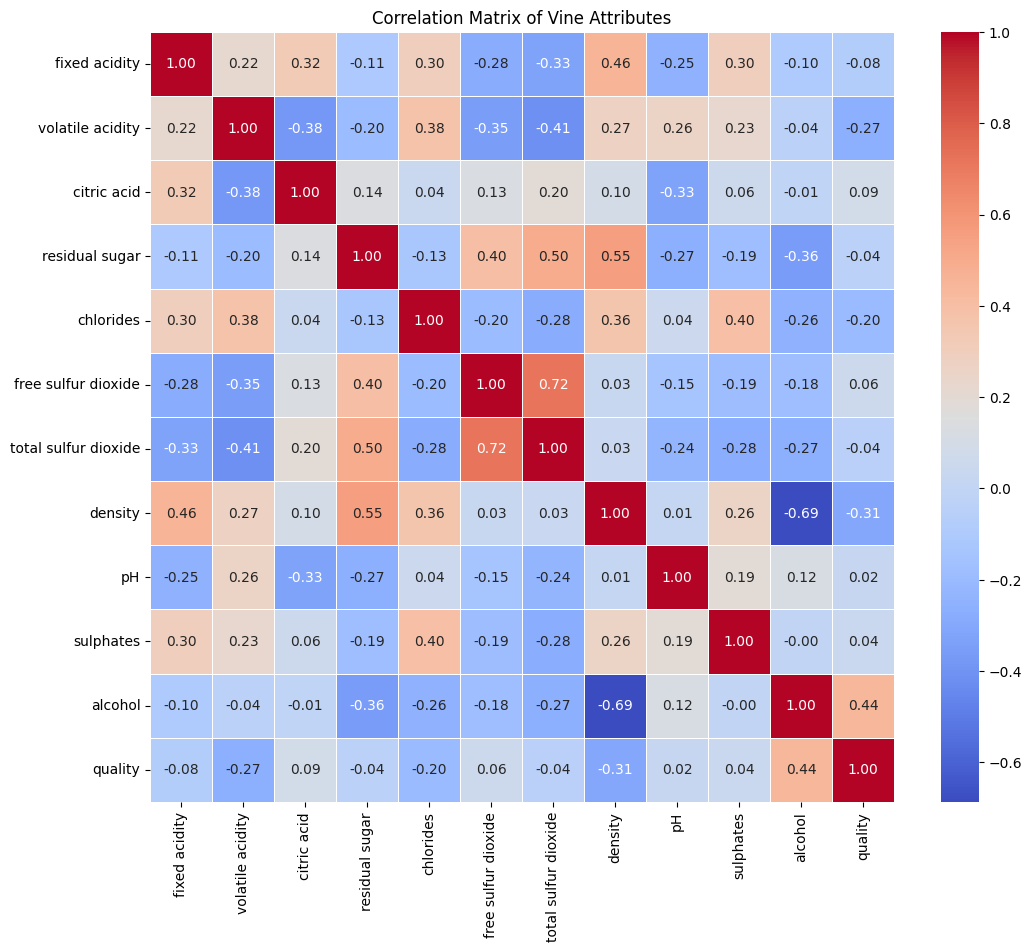

In [20]:

correlation_df = combined_df.drop(columns=['pH_bins', 'wine_type'])

correlation_matrix = correlation_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Vine Attributes')
plt.show()

It seems the alchohol in the wine is what mostly sets its quality as seen on the heatmap. If we simply find quality on the x or y axis and then look for the highest crossing value along its path, we'll see that alchohol lands with a value of positive 0.44.

The second most important after that seems to be the sulphates a simply 0.04 units less in importance.

### Prepare the data for further analysis

10. Explore the feature ‘residual sugar’. Is there any outlier (a value much different from the rest)?
On which row is it found? Remove that row.

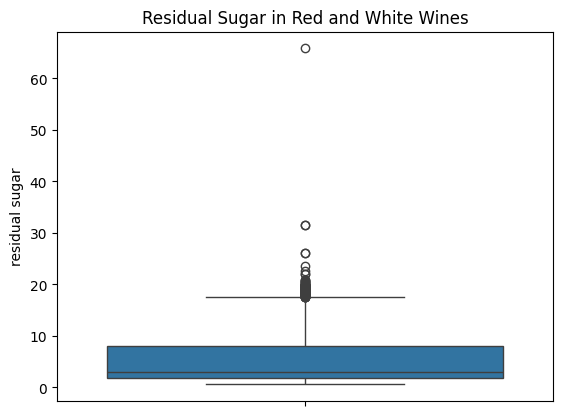

In [21]:
#Let us quickly plot the data to find outliers of residual sugar

sns.boxplot(data=combined_df['residual sugar'])
plt.title('Residual Sugar in Red and White Wines')
plt.show()


In [22]:
worst_outlier_row = combined_df.loc[combined_df['residual sugar'].idxmax()]

print("Row with the highest residual sugar (worst outlier):")
worst_outlier_row

Row with the highest residual sugar (worst outlier):


fixed acidity               7.8
volatile acidity          0.965
citric acid                 0.6
residual sugar             65.8
chlorides                 0.074
free sulfur dioxide         8.0
total sulfur dioxide      160.0
density                 1.03898
pH                         3.39
sulphates                  0.69
alcohol                    11.7
quality                       6
wine_type                 white
pH_bins                       5
Name: 4380, dtype: object

In [23]:
combined_df.drop(worst_outlier_row.name, inplace=True)


11. Identify the attribute with the lowest correlation to the wine quality and remove it.



In [24]:

corr_df = combined_df.copy()

corr_df.drop('wine_type', axis=1, inplace=True)

quality_corr = corr_df.corr()['quality'].sort_values()

lowest_corr = quality_corr.idxmin()

print(f'The column with the lowest correlation to quality is: {lowest_corr}')

The column with the lowest correlation to quality is: density


In [25]:
# Inplace is set to True so that the column is dropped from the dataframe and so i dont have to use df = df.drop() like i have before
combined_df.drop(lowest_corr, axis=1, inplace=True)

12. Transform the categorical data into numeric.


In [26]:
num_df = combined_df.copy()
num_df['wine-type'] = (combined_df['wine_type'] == 'red').astype(int)

In [27]:
num_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,wine_type,pH_bins,wine-type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,red,6,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,red,3,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,red,4,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,red,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,red,6,1


13. Try to reduce the number of features of the aggregated data set by applying principal
component analysis (PCA). What is the optimal number of components?

In [28]:
from sklearn.preprocessing import StandardScaler

# We import the standard scaler

num_df.drop('wine_type', axis=1, inplace=True)
numVal_df = num_df.values

print(numVal_df)

scaler = StandardScaler()
standardized_data = scaler.fit_transform(numVal_df)

# we now have a numpy array of the standardized data, we can convert it back to a dataframe if wanted.
standardized_data

[[7.4  0.7  0.   ... 5.   6.   1.  ]
 [7.8  0.88 0.   ... 5.   3.   1.  ]
 [7.8  0.76 0.04 ... 5.   4.   1.  ]
 ...
 [6.5  0.24 0.19 ... 6.   2.   0.  ]
 [5.5  0.29 0.3  ... 7.   4.   0.  ]
 [6.   0.21 0.38 ... 6.   4.   0.  ]]


array([[ 0.14253396,  2.19168464, -2.19299869, ..., -0.93712859,
         2.07298338,  1.75001117],
       [ 0.4510775 ,  3.2862188 , -2.19299869, ..., -0.93712859,
        -0.29461318,  1.75001117],
       [ 0.4510775 ,  2.55652936, -1.91766056, ..., -0.93712859,
         0.49458567,  1.75001117],
       ...,
       [-0.55168901, -0.6054582 , -0.88514257, ...,  0.20801575,
        -1.08381204, -0.57142492],
       [-1.32304786, -0.30142093, -0.12796272, ...,  1.35316009,
         0.49458567, -0.57142492],
       [-0.93736844, -0.78788056,  0.42271354, ...,  0.20801575,
         0.49458567, -0.57142492]])

In [29]:
np.mean(standardized_data), np.std(standardized_data)

(3.230963557832968e-17, 1.0)

In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(standardized_data)

PCA(n_components=10)

In [31]:
pca_data = pca.fit_transform(standardized_data)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)
pca_data

[0.30588045 0.17710312 0.13620638 0.0926225  0.06085631 0.05129663
 0.04419608 0.04137096 0.03548778 0.02350031]
[3.97705809 2.30269508 1.77095553 1.20427787 0.7912538  0.66695885
 0.57463753 0.53790531 0.46141214 0.30555101]


array([[ 4.27341227e+00, -1.28669315e+00,  2.12811125e+00, ...,
         5.78487098e-02, -5.60685426e-01, -1.37676787e-01],
       [ 3.41607186e+00,  1.04454927e+00,  1.81377901e+00, ...,
         2.74076392e-01, -3.32379409e-02, -4.59335706e-01],
       [ 3.63135247e+00,  5.15502371e-01,  1.56203009e+00, ...,
         2.69017379e-01, -1.07042143e-01, -2.82634751e-01],
       ...,
       [-1.07667284e+00,  3.91507225e-01, -3.36444192e-01, ...,
         5.27801404e-01, -1.19846810e+00, -3.44053634e-01],
       [-1.70296499e-01, -2.60153286e+00, -1.97834996e+00, ...,
        -6.14578250e-01,  3.69347782e-01, -3.60446171e-01],
       [-5.37704190e-01, -1.70496398e+00, -1.42417564e+00, ...,
        -5.17810282e-01,  7.09786690e-02,  3.33841484e-03]])

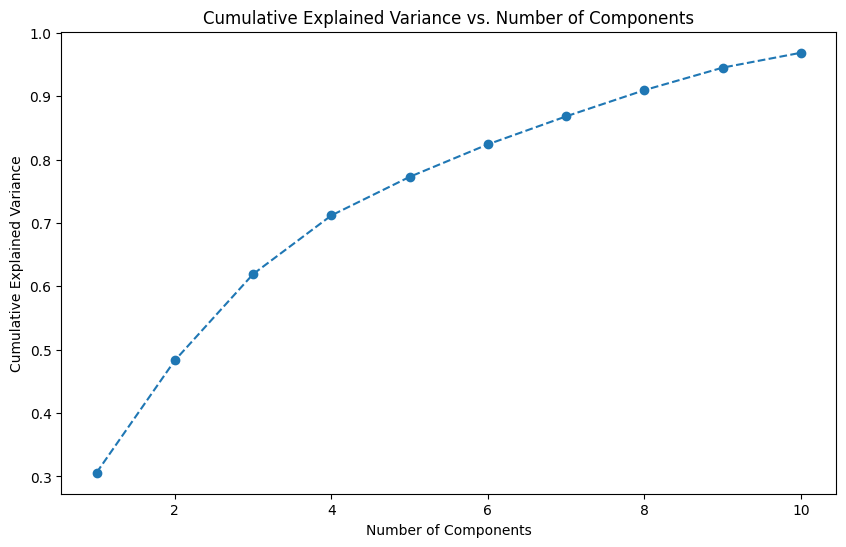

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.show()


In [33]:
pca2 = PCA(n_components=5)
pca_data2 = pca2.fit_transform(standardized_data)
pca_data2

array([[ 4.27341227, -1.28669315,  2.12811125, -1.00489851, -0.1357067 ],
       [ 3.41607186,  1.04454927,  1.81377901, -1.51345152, -1.91594453],
       [ 3.63135247,  0.51550237,  1.56203009, -1.26142716, -1.0756682 ],
       ...,
       [-1.07667284,  0.39150722, -0.33644419, -1.42169536, -0.28003395],
       [-0.1702965 , -2.60153286, -1.97834996, -0.51210243,  0.09300414],
       [-0.53770419, -1.70496398, -1.42417564, -0.81421981,  1.26600318]])

In [34]:

standard_data2 = pd.DataFrame(pca_data2, columns=["PC1", "PC2", "PC3", "PC4", "PC5"])

14. Print out ten random rows from the final dataset as a prove of concept.

In [35]:
standard_data2.sample(10)

,PC1,PC2,PC3,PC4,PC5
6151,-0.302938,-1.841607,-1.166133,0.092507,-0.073986
3717,0.113330,-2.249187,-0.781647,0.127777,1.125734
5187,-2.914578,2.789307,-0.765261,0.151829,0.096905
5865,-0.042565,-2.132787,-1.740787,-0.315807,-0.217120
3425,-1.613577,-0.471340,1.954133,-1.519523,-0.163192
1492,4.197673,-2.563925,0.676075,-1.201295,0.115795
3733,-0.666297,-0.826505,-0.097207,0.340036,0.073505
5499,1.804808,-2.502842,-0.491069,-3.509479,0.778512
1966,-0.789594,-0.097466,0.363768,-0.685841,-0.160885
5140,-1.777879,-0.106469,0.560559,0.366516,0.035380
